<a href="https://colab.research.google.com/github/UmeshikaThathsarani/FuelO/blob/feature%2Fmodel/FuelO_Finalized_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import KFold, train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('/content/OneHotEncoded.csv')
X = data.iloc[:, :-2].values
y = data[['City Fuel Consumption', 'Highway Fuel Consumption']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the DNN model architecture with L2 regularization
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(2, activation='linear')
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model using K-fold cross-validation
kf = KFold(n_splits=10, shuffle=True)
history = {'loss': [], 'val_loss': []}
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    hist = model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_val_fold, y_val_fold))
    history['loss'].extend(hist.history['loss'])
    history['val_loss'].extend(hist.history['val_loss'])

Epoch 1/10
819/819 [==============================] - 3s 3ms/step - loss: 3019301.2500 - val_loss: 173762.9844
Epoch 2/10
819/819 [==============================] - 2s 2ms/step - loss: 99409.7500 - val_loss: 72906.0859
Epoch 3/10
819/819 [==============================] - 2s 2ms/step - loss: 64814.4219 - val_loss: 61538.1875
Epoch 4/10
819/819 [==============================] - 2s 2ms/step - loss: 58239.8906 - val_loss: 58209.5273
Epoch 5/10
819/819 [==============================] - 2s 2ms/step - loss: 56923.5703 - val_loss: 58439.0547
Epoch 6/10
819/819 [==============================] - 3s 4ms/step - loss: 56891.9102 - val_loss: 59048.0273
Epoch 7/10
819/819 [==============================] - 2s 2ms/step - loss: 56848.9414 - val_loss: 60422.3008
Epoch 8/10
819/819 [==============================] - 2s 2ms/step - loss: 56689.9141 - val_loss: 57584.7969
Epoch 9/10
819/819 [==============================] - 2s 2ms/step - loss: 56482.1875 - val_loss: 57831.5234
Epoch 10/10
819/819 [====

228/228 [==============================] - 0s 1ms/step
Mean squared error for city fuel consumption: 14427.88296754749
Mean squared error for highway fuel consumption: 38039.97218122323
R-squared value for city fuel consumption: 0.9841384271327008
R-squared value for highway fuel consumption: 0.975997758017757


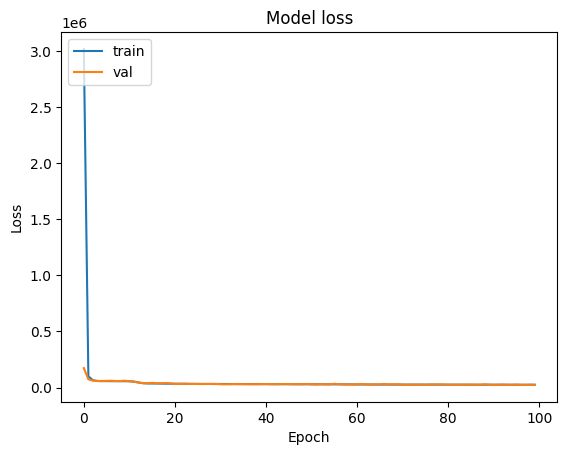

In [6]:
# Evaluate the model performance on the testing data
y_pred = model.predict(X_test)
mse_city = mean_squared_error(y_test[:,0], y_pred[:,0])
mse_highway = mean_squared_error(y_test[:,1], y_pred[:,1])
r2_city = r2_score(y_test[:,0], y_pred[:,0])
r2_highway = r2_score(y_test[:,1], y_pred[:,1])
print("Mean squared error for city fuel consumption:", mse_city)
print("Mean squared error for highway fuel consumption:", mse_highway)
print("R-squared value for city fuel consumption:", r2_city)
print("R-squared value for highway fuel consumption:", r2_highway)

# Visualize the training and validation loss curves
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

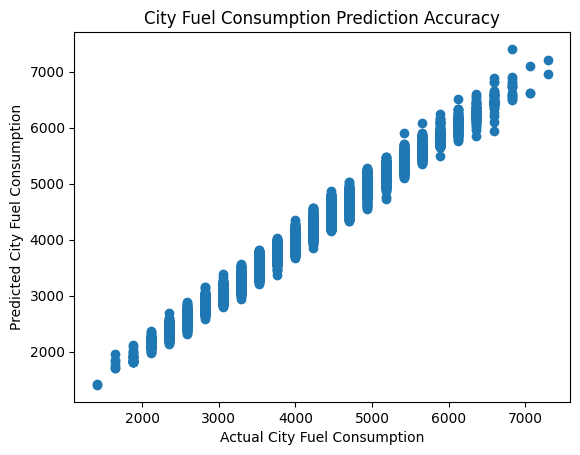

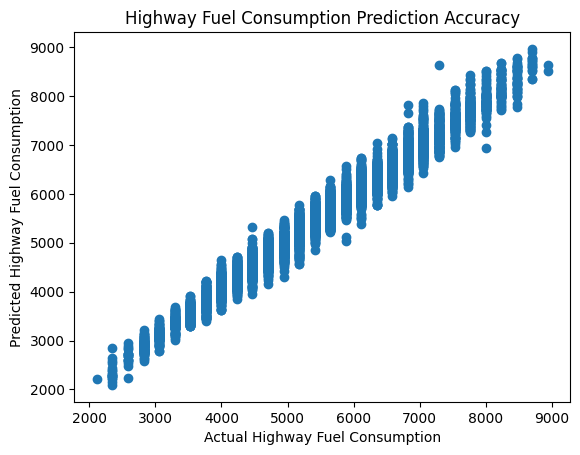

In [7]:
# Plot the predicted values against the actual values for city fuel consumption
plt.scatter(y_test[:, 0], y_pred[:, 0])
plt.xlabel('Actual City Fuel Consumption')
plt.ylabel('Predicted City Fuel Consumption')
plt.title('City Fuel Consumption Prediction Accuracy')
plt.show()

# Plot the predicted values against the actual values for highway fuel consumption
plt.scatter(y_test[:, 1], y_pred[:, 1])
plt.xlabel('Actual Highway Fuel Consumption')
plt.ylabel('Predicted Highway Fuel Consumption')
plt.title('Highway Fuel Consumption Prediction Accuracy')
plt.show()


In [8]:
model.save('fuel_consumption_prediction_model.h5')